# WORDLE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tqdm import tqdm as ProgressDisplay
import math

### Lecture des fichiers de mots de 5 lettres

In [3]:
# mots_1 = pd.read_json("mots.json")
# mots = pd.read_table("mots.txt",header=None) #version science etonnante
mots = pd.read_json("mots_off.json") #officielle depuis loane
words = pd.read_json("wordle_us.json")
data = mots.copy()
# alphabet= np.array(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
# alphabet= np.array(list('abcdefghijklmnopqrstuvwxyz'))
# frequence = {}
# for l in alphabet:
#     frequence[l]=0
# data.shape
dimension = data.size
print(dimension)

6025


### Convertir un array en string

In [4]:
def convert_array_mot(arr):
    return np.array([''.join(chr(e) for e in ligne )for ligne in arr])

### Convertir une string en array

In [5]:
def convert_mot_array(mots):
    return np.array([[ord(c)for c in w] for w in mots], dtype=np.uint8)

In [6]:
mots_array = convert_mot_array(data[0])
mots_array.shape
words_array = convert_mot_array(words[0])
words_array.shape

(12947, 5)

## Algorithm principal
 qui renvoie les options valides pour un mot, une pattern et une liste de mots
 * check : mot à tester
 * pattern : la pattern de type '01120'
 * M : le dictionnaire de mots

In [7]:
def check_mot_pattern(check,pattern,M=mots_array.copy(),k=5):
    # M = mots_array.copy()
    cnt = M.shape[0]
    for n in range(k):  # k = nb de lettres dans le mot
        c =ord(check[n])
        if (pattern[n]=='0'):
            # for i in range(k):
            #     M = M[~(M[:,i] == c)]
            P = (np.sum(M[:] == c,axis=1)).reshape((1,M.shape[0]))
            M = np.insert(M,0,P,axis=1)
            M = M[(M[:,0] == 0)]
            M = np.delete(M,0,axis=1)
        elif (pattern[n]=='2'):
            M = M[(M[:,n] == c)]
        else: # (pattern[n]=='1'):
            M = M[~(M[:,n] == c)] # on elimine la bonne postion
            # P = (M[:] == c)
            P = (np.sum(M[:] == c,axis=1)).reshape((1,M.shape[0]))
            # T = (np.sum(P[:], axis=1)).reshape((1,M.shape[0]))
            M = np.insert(M,0,P,axis=1)
            M = M[(M[:,0] > 0)]
            M = np.delete(M,0,axis=1)
    return M,M.shape[0]

In [973]:
def check_mot_pattern_new(check,pattern,M=mots_array.copy(),k=5):
    E=[]
    I=[]
    O=[]
    Il = dict()
    for i in range(k):
        p=pattern[i]
        if (p=='0'):
            a = np.array((int(i) ,int(ord(check[i]))), dtype=np.uint8) # np.int16)
            O = np.append(O,a,axis=0)
        elif (p=='1'):
            I.append([i, ord(check[i])])
            try:
                Il[check[i]] += 1
            except:
                Il[check[i]] = 1
        elif (p=='2'):
            E.append([i, ord(check[i])])
    # On élimine les (2)
    T = np.array([0,1,2,3,4])
    for i in E:
        M = M[(M[:,i[0]] == i[1])]
        T = T[T[:] != i[0]]
    # print(T)
    try:      
        dO = int(O.shape[0] / 2)
        if (dO>0):
            O = O.reshape(dO,2)
        for j in O:
            M = M[(M[:,int(j[0])] != int(j[1]))]
        for i in E:   #
            O = O[(O[:,1] != i[1])]
        for i in I:
            O = O[(O[:,1] != i[1])]
    except:
        a=0

    for i in O:
        P = (np.sum(M[:] == i[1],axis=1)).reshape((1,M.shape[0]))
        M = np.insert(M,0,P,axis=1)
        M = M[(M[:,0] == 0)]
        M = np.delete(M,0,axis=1)

    for i in I:
        M = M[~(M[:,i[0]] == i[1])] # on elimine la bonne postion
    if (len(I)>0):
        for i in Il:
            a = (np.sum(M[:,T]==ord(i),axis=1) == Il[i])
            M = np.insert(M,0,a,axis=1)
            M = M[(M[:,0] == True)]
            M = np.delete(M,0,axis=1)
    return M, len(M)

In [995]:
#test new mot
mat, n = check_mot_pattern_new('RAIES','11111')
print(n,convert_array_mot(mat))
mat, n = check_mot_pattern('TRAIS','11111')
print(n,convert_array_mot(mat))

0 []
1 ['SITAR']


In [985]:
# test check mot DEBIT avec PETIT
mat, n = check_mot_pattern('PETIT','02022')
print(n,convert_array_mot(mat))
mat, n = check_mot_pattern_new('PETIT','00122')
print(n,convert_array_mot(mat))

0 []
1 ['TRAIT']


In [72]:
M=mots_array.copy()
# print(M)
c=ord('E')
print(c,M.shape)
# print(M[~(M[:] == c)].shape)
P = (np.sum(M[:] == c,axis=1)).reshape((1,M.shape[0]))
M = np.insert(M,0,P,axis=1)
M = M[(M[:,0] == 0)]
M = np.delete(M,0,axis=1)
print(M.shape,M)


69 (6025, 5)
(2438, 5) [[65 85 83 83 73]
 [81 85 65 78 68]
 [65 76 79 82 83]
 ...
 [81 85 73 80 85]
 [72 73 78 68 73]
 [83 76 65 78 71]]


In [40]:
ret = mots_array.copy()
ret, nb = check_mot_pattern('RIMES','00100',ret)
if (nb>0):
    entropie = -log2_(nb,dimension)
else:
    entropie=0
print(nb,dimension,entropie,convert_array_mot(ret))

55 6025 -6.775385812480026 ['CHAMP' 'AMANT' 'PLOMB' 'ALBUM' 'MATCH' 'AMONT' 'MACON' 'MAGMA' 'MATOU'
 'MAGOT' 'MOULT' 'MATON' 'MOLLO' 'MOULU' 'MULLA' 'TAXUM' 'MANUL' 'LOUMA'
 'XALAM' 'MAQAM' 'MANOU' 'MANTA' 'MUNDA' 'MUNGO' 'OGHAM' 'MULCH' 'MANON'
 'MANAT' 'MYTHO' 'CLAMP' 'NDAMA' 'FANUM' 'MODAL' 'MALON' 'MAZOT' 'MANGA'
 'FATMA' 'MULOT' 'MACHO' 'MOGOL' 'FATUM' 'MATAF' 'MACHA' 'MUANT' 'BLOOM'
 'MOLTO' 'MANDA' 'CAVUM' 'DOUMA' 'PLUMA' 'MOULA' 'MULON' 'MOUND' 'AMBON'
 'MANGO']


In [9]:
def lettre_in(lettre,mot):
    return mot.find(lettre) 

## Creation de la pattern globale pour l'ensemble de 243 permutations (3^5)

In [10]:
def make_pattern(p=5):
    pattern=[]
    for k in range(pow(3,5)):
        if (k<1):
            pattern.append(np.base_repr(k,3,5))
        elif (k<3):
            pattern.append(np.base_repr(k,3,4))
        elif (k<9):
            pattern.append(np.base_repr(k,3,3))
        elif (k<27):
            pattern.append(np.base_repr(k,3,2))
        elif (k<81):
            pattern.append(np.base_repr(k,3,1))
        else:
            pattern.append(np.base_repr(k,3))
    return pattern

In [11]:
pattern = make_pattern(5)

## Calcul de l'Entropie

In [12]:
def log2_(val,div):
    return math.log2(div/val) if val >0 else 0

In [566]:
def entropie_mot_old(check, M=mots_array.copy()):
    dim = M.shape[0]
    e_sum=0
    e_pattern=[]
    for p in pattern:
        ret, nb = check_mot_pattern(check,p,M)
        # print(nb,p,dim)
        e = log2_(nb,dim)
        e_pattern.append(e)
        e_sum = e_sum + e*nb/dim
    return e_sum,e_pattern


In [976]:
def entropie_mot(check, M=mots_array.copy()):
    dim = M.shape[0]
    e_sum=0
    e_pattern=[]
    for p in pattern:
        ret, nb = check_mot_pattern_new(check,p,M)
        e = log2_(nb,dim)
        e_pattern.append(e)
        e_sum = e_sum + e*nb/dim
        # print(nb,p,dim,e,e_sum)
    return e_sum,e_pattern


3.19474881208606


<BarContainer object of 243 artists>

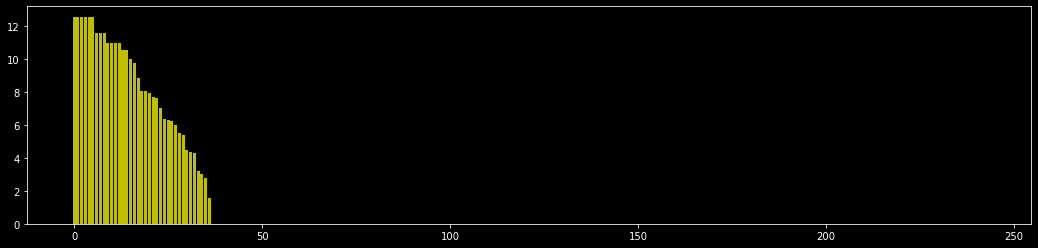

In [963]:
e, e_p = entropie_mot_old('SASSA')
print(e)
gr = np.sort(e_p)[::-1]
# print(gr)
plt.figure(figsize=(18,4))
plt.bar(x=range(243),height=gr,color='y')

7.062202298860446


<BarContainer object of 243 artists>

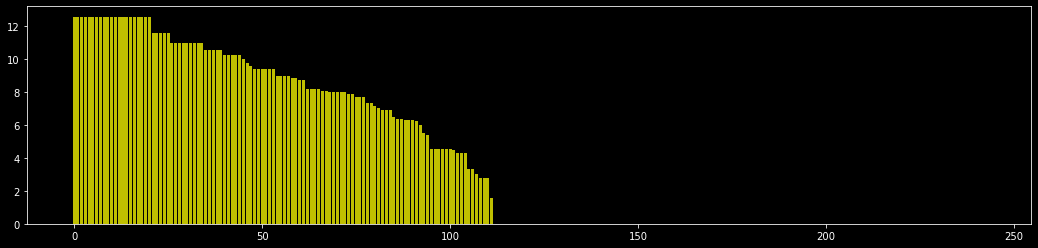

In [977]:
e, e_p = entropie_mot('SASSA')
print(e)
gr = np.sort(e_p)[::-1]
# print(gr)
plt.figure(figsize=(18,4))
plt.bar(x=range(243),height=gr,color='y')

# Calcul initial

Cela permet de déterminer dans 'liste_entropie' l'entropie de tous les mots dans le dictionnaire

L'entropie c'est : E = - log(p)/log(2)
ou p est la probabilité


In [978]:
# initialement 9m05s ... maintenat 12:50 avec 6025 mots
liste_entropie = {}
for mot in ProgressDisplay(data[0]):
    liste_entropie[mot] = entropie_mot(mot)[0]
liste_entropie = sorted(liste_entropie.items(), key=lambda x: x[1],reverse=True)

100%|██████████| 6025/6025 [07:19<00:00, 13.72it/s]


In [980]:
h = liste_entropie[0:60]
# print(list(iter(h)))
# for item in h:
#     for i in item:
#         print(i[::-1])
print(h)

[('AERER', 7.692257401535696), ('ERRES', 7.639209533269642), ('SENSE', 7.631947647369688), ('CESSE', 7.4624477905809705), ('EPEES', 7.399406589213684), ('SERRE', 7.395322010211328), ('REELS', 7.367722449809535), ('ASSAI', 7.342845126990091), ('AERES', 7.332216152804739), ('TERRE', 7.324212636031417), ('PESSE', 7.314524938362664), ('MESSE', 7.307314671244524), ('ETETE', 7.2978282284944775), ('ERSES', 7.269921317827716), ('CREER', 7.240340715659045), ('TETES', 7.2100624784521115), ('ELEIS', 7.185393956723126), ('RUEES', 7.163781151766486), ('GESSE', 7.1282322317176), ('LIEES', 7.102290622391617), ('SERES', 7.0928054974659105), ('ELLES', 7.083713759439617), ('RECRE', 7.083258277197342), ('ELIES', 7.063454303688713), ('SASSA', 7.062202298860446), ('SAISI', 7.0518590334993005), ('TETER', 7.047403271843154), ('OREES', 7.041142674842902), ('OSEES', 7.040294466095521), ('ESTES', 7.039192636405923), ('LESES', 7.016694369266448), ('RENES', 7.015785062923477), ('NIEES', 7.014188080736655), ('TUEE

## Aide au jeux
temps initial = 6,6s

Nous proposons RIMES
et calculons au préalable sont Entropie = 5,71971

nous jouons pour obtenir un résultat ⬛⬛🟨⬛⬛ soit '00100'

au final l'Entropie de ce choix est de 6,775 puisqu'il nous reste plus que 55 possibilités


In [26]:
E, E_detail = entropie_mot('RIMES')
print("Entropie de 'RIMES' = ",E)
ret,e = check_mot_pattern('RIMES','00100')
# print(pattern.index('00100')) marche pas car retrié !!!
print("Entropie si pattern='00100' ",math.log2(dimension/e))


Entropie de 'RIMES' =  5.719713732680308
Entropie si pattern='00100'  6.775385812480026


In [830]:
def conseil(check,pattern,M=mots_array.copy()):
    ret, nb = check_mot_pattern_new(check,pattern,M)
    E = -log2_(nb,M.shape[0])
    new_liste = convert_array_mot(ret)
    # print(nb, E)
    new_entropie = {}
    for mot in ProgressDisplay(new_liste):
        new_entropie[mot] = entropie_mot(mot,ret)
    # print(f'Test : {new_entropie}')
    return(list(new_entropie))

In [363]:
# 
ret, nb = check_mot_pattern('MOULE','00001',mots_array.copy())
E = - log2_(nb,dimension)
new_liste = convert_array_mot(ret)
print(nb, E)
new_entropie = {}
for mot in ProgressDisplay(new_liste):
    new_entropie[mot] = entropie_mot(mot,ret)
new_entropie = sorted(new_entropie.items(), key=lambda x: x[1],reverse=True)


682 -3.1431175969805136


100%|██████████| 682/682 [00:21<00:00, 32.36it/s]


In [364]:
print(dimension,ret.shape)
# print(f'Test : {new_entropie[:20]}')

6025 (682, 5)


In [817]:
# ret=mots_array.copy()
dim = ret.shape[0]
ret, nb = check_mot_pattern('PARTE','02101',ret)
print(nb)
E = - log2_(nb,dim)
new_liste = convert_array_mot(ret)
print(nb, dim, E,new_liste)

31
31 682 -4.459431618637297 ['RACES' 'RAIES' 'NAGER' 'RASER' 'RASES' 'BAVER' 'CASER' 'RAYES' 'RAYER'
 'RADES' 'FAXER' 'BADER' 'RADER' 'HAVER' 'RAVER' 'GAVER' 'RAVES' 'RAGES'
 'FANER' 'BAYER' 'JASER' 'BASER' 'FADER' 'CANER' 'RAGER' 'GAZER' 'RACER'
 'GAGER' 'VASER' 'CAVER' 'RABES']


# Simulation de jeux

* data[0] : liste de mots du dictionnaire
* mots_array : tableau des mots

In [18]:
def test_mot(check,ref,k=5):
    rep=np.array([0,0,0,0,0])
    for i in range(k):
        if (check[i]==ref[i]):
            rep[i]=2
        else:
            if (lettre_in(check[i],ref) == -1):
                rep[i] = 0
            else:
                rep[i] = 1
    return rep

In [19]:
def affiche_score(arr,k=5):
    rep=''
    for i in range(k):
        if (arr[i]==2):
            rep = rep + '🟩'
        if (arr[i]==1):
            rep = rep + '🟨'
        if (arr[i]==0):
            rep = rep + '⬛'
    return rep

In [20]:
def tire_sort():
    ret = np.random.choice(data[0])
    return ret

In [22]:
def toStr(arr):
    ret = ''
    for c in arr:
        ret = ret + str(c)
    return ret

In [21]:
secret = tire_sort()
print('le mot secret est : ',secret)

le mot secret est :  FEMUR


In [850]:
first='ORVET'
rep = test_mot(first,secret)
print (affiche_score(rep))

⬛🟨⬛🟨⬛


In [851]:
ret, nb = check_mot_pattern(first,'10001',mots_array.copy())
convert_array_mot(ret)

array(['TOTAL', 'PHOTO', 'TOITS', 'PONTS', 'COTON', 'COUTS', 'MOTIF',
       'BATON', 'BOUTS', 'GOUTS', 'FOUTU', 'FLOTS', 'TALON', 'AUTOS',
       'STOCK', 'MONTS', 'STYLO', 'ILOTS', 'PITON', 'TANGO', 'TABOU',
       'HOSTO', 'PATIO', 'MOTOS', 'MATOU', 'TONDU', 'MATON', 'TONUS',
       'TIMON', 'LOTUS', 'GOTHA', 'TOMMY', 'TCHAO', 'COTIS', 'MOITI',
       'NUTON', 'TOSAS', 'TOLBA', 'TOLUS', 'BOTOS', 'TOKAJ', 'FITOU',
       'THIOF', 'TONCA', 'TONKA', 'ATOCA', 'TOBYS', 'DIOTS', 'POTTO',
       'TIFOS', 'DHOTI', 'TOFUS', 'BOTOX', 'SOFTS', 'THIOL', 'TAXOL',
       'FOOTS', 'STOTS', 'ABOTS', 'KOTOS', 'TUTOS', 'TOMAN', 'POTUS',
       'TONFA', 'AOUTS', 'GOUTU', 'SOTHO', 'PITOU', 'JOTAS', 'SCATO',
       'HOSTS', 'SOTCH', 'MATOS', 'TYPON', 'POSTS', 'SHOTS', 'DOITS',
       'FUTON', 'CLITO', 'TAINO', 'TAXON', 'TAUON', 'ZLOTY', 'LOFTS',
       'COLTS', 'TACOS', 'TONGS', 'TOUTS', 'BUTOS', 'TONDO', 'PATOU',
       'MYTHO', 'TAPON', 'DOTAL', 'TOPIC', 'HOSTA', 'COATI', 'POTIN',
       'THONS', 'TIS

In [846]:
ret = check_mot_pattern('ORVET','00000')
print(ret)

(array([[65, 85, 83, 83, 73],
       [81, 85, 65, 78, 68],
       [65, 73, 78, 83, 73],
       ...,
       [81, 85, 73, 80, 85],
       [72, 73, 78, 68, 73],
       [83, 76, 65, 78, 71]], dtype=uint8), 629)


In [39]:
rep = test_mot('TOITS',secret)
print(toStr(rep))
affiche_score(rep)

00100


'⬛⬛🟨⬛⬛'

In [761]:
conseil('AIRES','11001')

0it [00:00, ?it/s]


[]

In [41]:
data[0].searchsorted('MOULE')

2004

In [20]:
#simuler un jeu
def simul():
    secret = tire_sort()
    propal = 'RAIES' #plus forte Entropie
    filtre = mots_array.copy() # init avec tous le dictionnaire
    iter=0
    while (propal != secret):
        reponse = test_mot(propal,secret) # plus forte entropie
        filtre,nb = check_mot_pattern(propal,toStr(reponse),filtre)
        propal = conseil(propal,toStr(reponse),filtre)[0]
        print(iter, propal, secret, affiche_score(reponse))
        iter = iter +1
    return iter

In [ ]:
jeux=np.array((0))
print(jeux)
for i in range(5):
    jeux = np.append(jeux,simul())
print('Moyenne des succès :',jeux.mean(axis=0))

In [44]:
var = '🟩⬛🟨'

In [45]:
jeux.mean()


3.6666666666666665

In [1041]:
reponse = conseil('AIRES','00020')
reponse = conseil('OBJET','10122',convert_mot_array(reponse))
# reponse = conseil('FINAL','02121',convert_mot_array(reponse))
# reponse = conseil('CHANT','01101',convert_mot_array(reponse))
# reponse = conseil('TOMAH','12011',convert_mot_array(reponse))
# print(reponse)
# a,b = check_mot_pattern_new('PETIT','02022',convert_mot_array(reponse))
# print(convert_array_mot(a),b)
# reponse = conseil('PETIT','02022',convert_mot_array(reponse))
# reponse = conseil('NAGER','02022',convert_mot_array(reponse))
# reponse = conseil('RATER','12222',convert_mot_array(reponse))
reponse

100%|██████████| 1/1 [00:00<00:00, 28.15it/s]


['JOUET']

In [360]:
convert_array_mot(a)

array(['DEBIT', 'BENIT', 'DEDIT', 'MEDIT'], dtype='<U5')

In [1039]:
reponse = conseil('crane','00202',words_array)
reponse = conseil('evade','10202',convert_mot_array(reponse))
# reponse = conseil('masse','02022',convert_mot_array(reponse))
# reponse = conseil('pause','12022',convert_mot_array(reponse))
print(reponse)

100%|██████████| 14/14 [00:00<00:00, 29.25it/s]

['tease', 'lease', 'fease', 'feaze', 'heame', 'leaze', 'mease', 'peage', 'pease', 'peaze', 'seame', 'sease', 'seaze', 'teaze']


In [591]:
reponse = conseil('quiet','00022',convert_mot_array(reponse))
print(reponse)

100%|██████████| 8/8 [00:00<00:00, 36.61it/s]

['sweet', 'beset', 'sheet', 'beget', 'tweet', 'bewet', 'ebbet', 'skeet']


In [843]:
reponse=conseil('TARIE','00112')
print(reponse)

100%|██████████| 67/67 [00:01<00:00, 36.55it/s]

['LIVRE', 'VIVRE', 'LIBRE', 'NOIRE', 'PRISE', 'BOIRE', 'CRISE', 'RICHE', 'PRIVE', 'REINE', 'GRISE', 'VOIRE', 'CRIME', 'BRISE', 'BIERE', 'RUINE', 'PRIME', 'FOIRE', 'FIERE', 'CUIRE', 'BRIDE', 'POIRE', 'FRISE', 'FIBRE', 'URINE', 'NUIRE', 'FRIME', 'GIVRE', 'VIBRE', 'ELIRE', 'LUIRE', 'CIDRE', 'ERIGE', 'RINCE', 'RIDEE', 'FRIPE', 'MOIRE', 'SPIRE', 'RISEE', 'RUILE', 'RIPEE', 'RIFFE', 'ERINE', 'IRONE', 'BRIEE', 'RISSE', 'LIURE', 'CIPRE', 'CRIEE', 'ROIDE', 'BRIBE', 'PRIEE', 'BIGRE', 'RIVEE', 'FIFRE', 'DRIVE', 'BRIME', 'GRIVE', 'RIFLE', 'BRIZE', 'GRIME', 'RIMEE', 'MIGRE', 'IBERE', 'SBIRE', 'RIBLE', 'BUIRE']


In [844]:
reponse = conseil('LIBRE','01122',convert_mot_array(reponse))
reponse

100%|██████████| 4/4 [00:00<00:00, 35.60it/s]


['BOIRE', 'IBERE', 'SBIRE', 'BUIRE']